In [154]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors = []

        for _ in range(self.epochs):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [155]:
class Adaline:
    def __init__(self, learning_rate=0.01, epochs=50):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.costs = []

        for _ in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.weights[1:] += self.learning_rate * X.T.dot(errors)
            self.weights[0] += self.learning_rate * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.costs.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [156]:
class SGD:
    def __init__(self, learning_rate=0.01, epochs=50, shuffle=True, random_state=None):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.shuffle = shuffle
        self.random_state = random_state
        if random_state:
            np.random.seed(random_state)

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.costs = []

        for _ in range(self.epochs):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                cost.append(0.5 * (update ** 2))
            avg_cost = sum(cost) / len(y)
            self.costs.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        if not hasattr(self, 'weights'):
            self.weights = np.zeros(1 + X.shape[1])
        for xi, target in zip(X, y):
            update = self.learning_rate * (target - self.predict(xi))
            self.weights[1:] += update * xi
            self.weights[0] += update
        return self

    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


Iterations for iris.data: 10, number of errors: 10


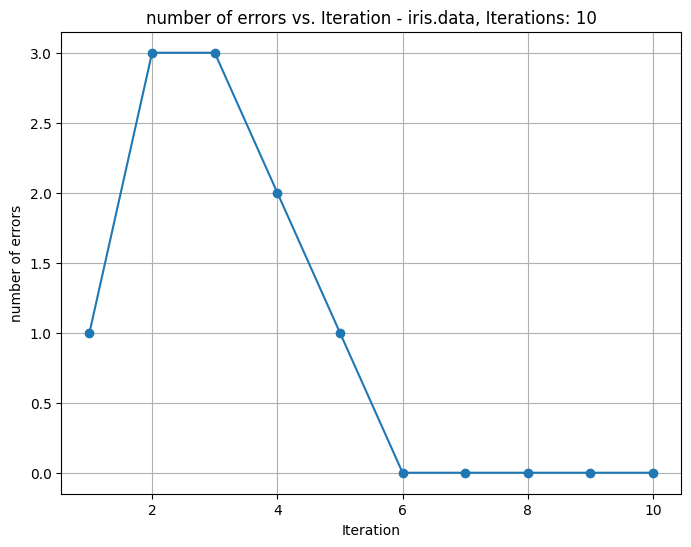

Iteration 1: Accuracy = 50.00%
Iteration 2: Accuracy = 50.00%
Iteration 3: Accuracy = 50.00%
Iteration 4: Accuracy = 50.00%
Iteration 5: Accuracy = 100.00%
Iteration 6: Accuracy = 100.00%
Iteration 7: Accuracy = 100.00%
Iteration 8: Accuracy = 100.00%
Iteration 9: Accuracy = 100.00%
Iteration 10: Accuracy = 100.00%
Total time took to execute  0.04007554054260254
Iterations for buddymove_holidayiq.csv: 10, number of errors: 20


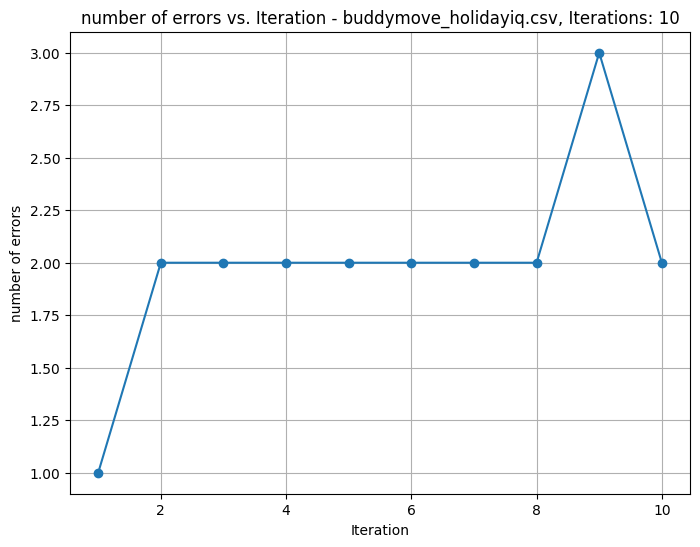

Iteration 1: Accuracy = 99.60%
Iteration 2: Accuracy = 99.60%
Iteration 3: Accuracy = 99.60%
Iteration 4: Accuracy = 99.60%
Iteration 5: Accuracy = 99.60%
Iteration 6: Accuracy = 99.60%
Iteration 7: Accuracy = 99.60%
Iteration 8: Accuracy = 99.60%
Iteration 9: Accuracy = 99.60%
Iteration 10: Accuracy = 99.60%
Total time took to execute  0.05230545997619629


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

class Perceptron:
    def __init__(self, eta=0.01, n_iter=10, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.accuracies = []  # Initialize list to store accuracies

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            accuracy = self.calculate_accuracy(X, y)  # Calculating accuracy after each iteration
            self.accuracies.append(accuracy)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def calculate_accuracy(self, X, y):
        predictions = np.where(np.dot(X, self.weights[1:]) + self.weights[0] >= 0.0, 1, -1)
        accuracy = np.mean(predictions == y)
        return accuracy

def load_data(file_path):
    if file_path == 'iris.data':
        data = pd.read_csv('iris.data', header=None)
        X = data.iloc[0:100, [0,2]].values
        y = data.iloc[0:100, 4].values
        y = np.where(y == 'Iris-setosa', -1, 1)
    elif file_path == 'buddymove_holidayiq.csv':
        data = pd.read_csv('buddymove_holidayiq.csv')
        X = data.iloc[:, 1:].values
        y = data.iloc[:, 0].values
        y = np.where(y == 'User 1', -1, 1)
    else:
        raise ValueError("Invalid file path.")
    return X, y

def plot_updates(updates, data_file, iterations):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(updates) + 1), updates, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('number of errors')
    plt.title(f'number of errors vs. Iteration - {data_file}, Iterations: {iterations}')
    plt.grid(True)
    plt.show()

def main():
    data_files = ['iris.data', 'buddymove_holidayiq.csv']

    for data_file in data_files:
        X, y = load_data(data_file)
        clf = Perceptron(eta=0.1, n_iter=10)
        st_time=time.time()
        clf.fit(X, y)
        ed_time=time.time()
        accuracy = clf.calculate_accuracy(X, y)
        print(f"Iterations for {data_file}: {clf.n_iter}, number of errors: {sum(clf.errors_)}")
        plot_updates(clf.errors_, data_file, clf.n_iter)

        for i, acc in enumerate(clf.accuracies, start=1):
            print(f"Iteration {i}: Accuracy = {acc*100:.2f}%")

        print("Total time took to execute ",ed_time-st_time)

if __name__ == "__main__":
    main()


adaline

Iterations for iris.data: 1000, Accuracy: 50.0%
Costs for iris.data: [0.5, 0.4985300897220251, 0.49706540792824727, 0.4956059357193066, 0.494151654264274, 0.4927025448004029, 0.49125858863288274, 0.4898197671345924, 0.48838606174585597, 0.48695745397419765, 0.4855339253940987, 0.48411545764675507, 0.4827020324398358, 0.48129363154724203, 0.4798902368088671, 0.4784918301303583, 0.47709839348287786, 0.4757099089028661, 0.474326358491805, 0.47294772441598293, 0.471573988906259, 0.47020513425783045, 0.46884114282999917, 0.46748199704593896, 0.466127679392465, 0.4647781724198036, 0.46343345874136127, 0.46209352103349716, 0.46075834203529453, 0.459427904548334, 0.45810219143646647, 0.45678118562558856, 0.4554648701034173, 0.45415322791926577, 0.45284624218382197, 0.45154389606892403, 0.45024617280734064, 0.4489530556925495, 0.4476645280785176, 0.44638057337948256, 0.44510117506973396, 0.4438263166833958, 0.4425559818142102, 0.4412901541153213, 0.44002881729905985, 0.4387719551367295, 0.43751

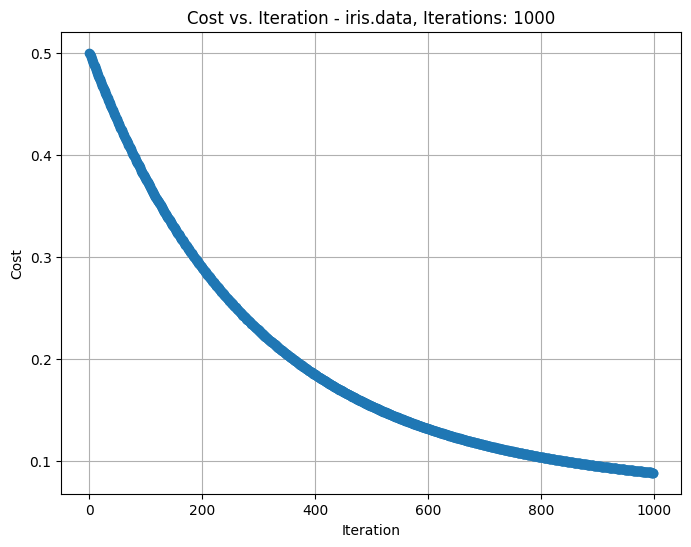

Iterations for buddymove_holidayiq.csv: 1000, Accuracy: 99.59839357429718%
Costs for buddymove_holidayiq.csv: [0.5, 0.49755156791984745, 0.4951153272393489, 0.4926912171024712, 0.49027917695940987, 0.48787914656500936, 0.48549106597719077, 0.48311487555538923, 0.480750515958999, 0.47839792814582793, 0.47605705337056026, 0.473727833183228, 0.47141020942769013, 0.4691041242401217, 0.46680952004750936, 0.46452633956615647, 0.4622545258001964, 0.45999402204011286, 0.4577447718612704, 0.45550671912245033, 0.45327980796439726, 0.4510639828083719, 0.4488591883547121, 0.4466653695814028, 0.4444824717426517, 0.44231044036747513, 0.4401492212582897, 0.43799876048951253, 0.4358590044061691, 0.43372989962250824, 0.43161139302062507, 0.429503431749091, 0.42740596322159174, 0.4253189351155718, 0.42324229537088726, 0.4211759921884653, 0.4191199740289709, 0.4170741896114811, 0.41503858791216625, 0.413013118162978, 0.41099772985034494, 0.408992372713875, 0.4069969967450646, 0.4050115521860152, 0.403035

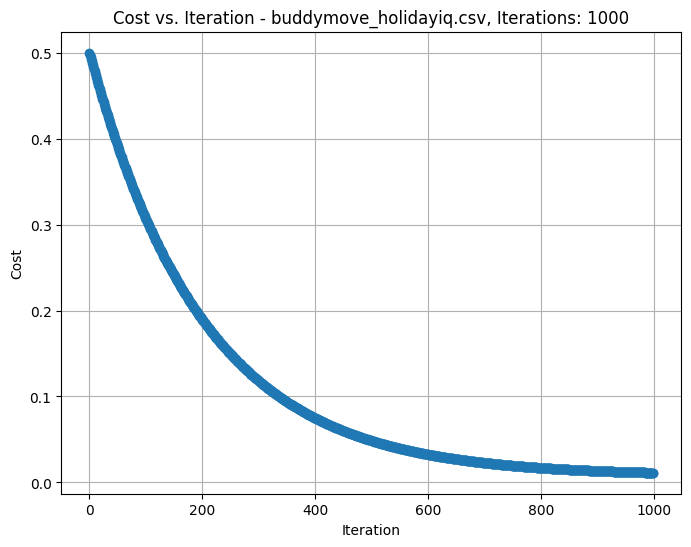

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Adaline:
    def __init__(self, eta=0.00001, n_iter=1000, tolerance=1e-6):
        self.eta = eta
        self.n_iter = n_iter
        self.tolerance = tolerance
        self.iterations = 0

    def fit(self, X, y):
        X_normalized = self._normalize(X)
        self.weights = np.zeros(X_normalized.shape[1] + 1)
        self.cost_history = []
        for epoch in range(self.n_iter):
            net_input = self.net_input(X_normalized)
            errors = y - net_input
            self.weights[1:] += self.eta * X_normalized.T.dot(errors)
            self.weights[0] += self.eta * errors.sum()
            cost = np.mean(errors**2) / 2
            self.cost_history.append(cost)
            if epoch > 0 and abs(self.cost_history[-1] - self.cost_history[-2]) < self.tolerance:
                break
            self.iterations += 1
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        X_normalized = self._normalize(X)
        return np.where(self.net_input(X_normalized) >= 0.0, 1, -1)

    def _normalize(self, X):
        X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
        return X_normalized

def load_data(file_path):
    if file_path == 'iris.data':
        data = pd.read_csv('iris.data', header=None)
        X = data.iloc[0:100, [0,2]].values
        y = data.iloc[0:100, 4].values
        y = np.where(y == 'Iris-setosa', -1, 1)
    elif file_path == 'buddymove_holidayiq.csv':
        data = pd.read_csv('buddymove_holidayiq.csv')
        X = data.iloc[:, 1:].values
        y = data.iloc[:, 0].values
        y = np.where(y == 'User 1', -1, 1)
    else:
        raise ValueError("Invalid file path.")
    return X, y

def plot_updates(cost_history, data_file, iterations):
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(cost_history)), cost_history, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Iteration - {data_file}, Iterations: {iterations}')
    plt.grid(True)
    plt.show()

def calculate_accuracy(X, y, weights):
    predictions = np.where(np.dot(X, weights[1:]) + weights[0] >= 0.0, 1, -1)
    accuracy = (predictions == y).mean() * 100
    return accuracy

def main():
    data_files = ['iris.data', 'buddymove_holidayiq.csv']

    for data_file in data_files:
        X, y = load_data(data_file)
        clf = Adaline(eta=0.00001, n_iter=1000, tolerance=1e-6)
        st_time=time.time()
        clf.fit(X, y)
        ed_time=time.time()
        accuracy = calculate_accuracy(X, y, clf.weights)
        print(f"Iterations for {data_file}: {clf.iterations}, Accuracy: {accuracy}%")
        print(f"Costs for {data_file}: {clf.cost_history}")


        print("Total time took to execute ",ed_time-st_time)
        plot_updates(clf.cost_history, data_file, clf.iterations)

if __name__ == "__main__":
    main()


Iterations for iris.data:
Iteration 1: Accuracy = 49.00%
Iteration 2: Accuracy = 48.00%
Iteration 3: Accuracy = 47.00%
Iteration 4: Accuracy = 47.00%
Iteration 5: Accuracy = 54.00%
Iteration 6: Accuracy = 60.00%
Iteration 7: Accuracy = 50.00%
Iteration 8: Accuracy = 50.00%
Iteration 9: Accuracy = 44.00%
Iteration 10: Accuracy = 54.00%
Epochs for iris.data: 10, Final Accuracy: 54.00%


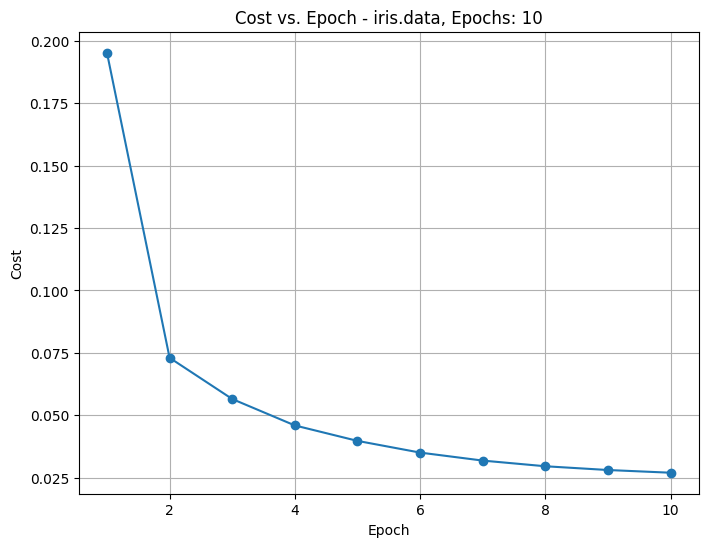

Total time took to execute  0.021347522735595703
Iterations for buddymove_holidayiq.csv:
Iteration 1: Accuracy = 99.60%
Iteration 2: Accuracy = 99.60%
Iteration 3: Accuracy = 99.60%
Iteration 4: Accuracy = 99.60%
Iteration 5: Accuracy = 99.60%
Iteration 6: Accuracy = 99.60%
Iteration 7: Accuracy = 99.60%
Iteration 8: Accuracy = 99.60%
Iteration 9: Accuracy = 99.60%
Iteration 10: Accuracy = 99.60%
Epochs for buddymove_holidayiq.csv: 10, Final Accuracy: 99.60%


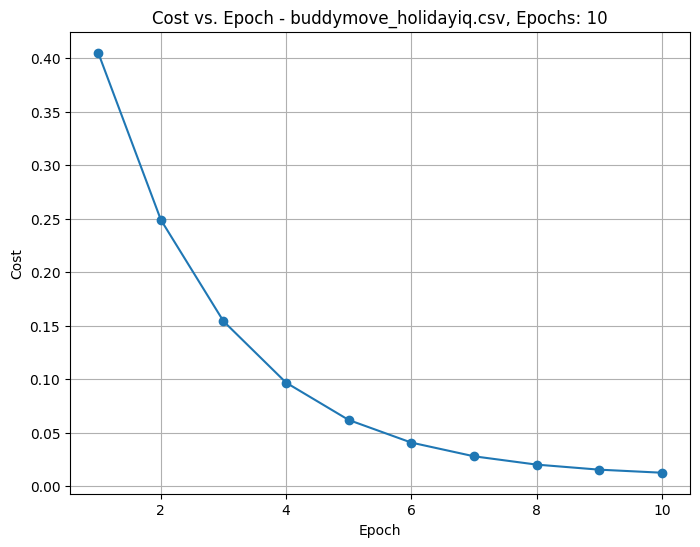

Total time took to execute  0.055457115173339844


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

class SimpleSGDClassifier:
    def __init__(self, learning_rate=0.0001, epochs=10, shuffle=True, random_state=None, regularization=0.0001):
        self.lr = learning_rate
        self.epochs = epochs
        self.shuffle = shuffle
        self.random_state = random_state
        self.regularization = regularization
        self.weights_initialized = False
        self.cost_history = []
        self.accuracies = []

    def fit(self, X, y):
        X_normalized = self._normalize(X)
        self._initialize_weights(X_normalized.shape[1])
        self.cost_history = []
        self.accuracies = []

        for i in range(self.epochs):
            if self.shuffle:
                X_normalized, y = self._shuffle(X_normalized, y)
            costs = []
            for xi, target in zip(X_normalized, y):
                costs.append(self._update_weights(xi, target))
            avg_cost = np.mean(costs)
            self.cost_history.append(avg_cost)
            accuracy = self.calculate_accuracy(X, y)
            self.accuracies.append(accuracy)  # Storing accuracy for each iteration
            self.lr /= (1 + self.regularization * i)  # Learning rate decay
        return self

    def partial_fit(self, X, y):
        if not self.weights_initialized:
            X_normalized = self._normalize(X)
            self._initialize_weights(X_normalized.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X_normalized, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X_normalized, y)
        return self

    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.weights = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.weights_initialized = True

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _normalize(self, X):
        X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
        return X_normalized

    def _net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def _activation(self, X):
        return self._net_input(X)

    def _update_weights(self, xi, target):
        output = self._activation(xi)
        error = (target - output)
        self.weights[1:] += self.lr * (xi.dot(error) - self.regularization * self.weights[1:])  # Regularization
        self.weights[0] += self.lr * error
        cost = 0.5 * np.sum(error**2)
        return cost

    def predict(self, X):
        X_normalized = self._normalize(X)
        return np.where(self._net_input(X_normalized) >= 0.0, 1, -1)

    def calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y) * 100
        return accuracy

def load_data(file_path):
    if file_path == 'iris.data':
        data = pd.read_csv('iris.data', header=None)
        X = data.iloc[0:100, [0, 2]].values
        y = data.iloc[0:100, 4].values
        y = np.where(y == 'Iris-setosa', -1, 1)
        learning_rate = 0.01
        epochs = 10
    elif file_path == 'buddymove_holidayiq.csv':
        data = pd.read_csv('buddymove_holidayiq.csv')
        X = data.iloc[:, 1:].values
        y = data.iloc[:, 0].values
        y = np.where(y == 'User 1', -1, 1)
        learning_rate = 0.001
        epochs = 10
    else:
        raise ValueError("Invalid file path.")
    return X, y, learning_rate, epochs

def plot_cost_history(cost_history, data_file, epochs):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cost_history) + 1), cost_history, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title(f'Cost vs. Epoch - {data_file}, Epochs: {epochs}')
    plt.grid(True)
    plt.show()

def main():
    data_files = ['iris.data', 'buddymove_holidayiq.csv']

    for data_file in data_files:
        X, y, learning_rate, epochs = load_data(data_file)
        clf = SimpleSGDClassifier(learning_rate=learning_rate, epochs=epochs)
        st_time=time.time()
        clf.fit(X, y)
        ed_time=time.time()

        print(f"Iterations for {data_file}:")
        for i, acc in enumerate(clf.accuracies, start=1):
            print(f"Iteration {i}: Accuracy = {acc:.2f}%")

        accuracy = clf.accuracies[-1]
        print(f"Epochs for {data_file}: {clf.epochs}, Final Accuracy: {accuracy:.2f}%")
        plot_cost_history(clf.cost_history, data_file, clf.epochs)
        print("Total time took to execute ",ed_time-st_time)

if __name__ == "__main__":
    main()


7th

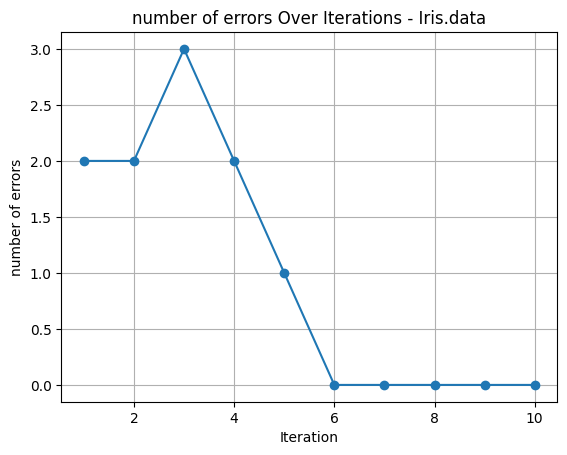

Iris.data Dataset - Final Accuracy: 100.00%
Iterations for Iris.data
Class 1:
Iteration 1: Number of errors = 2
Iteration 2: Number of errors = 2
Iteration 3: Number of errors = 3
Iteration 4: Number of errors = 2
Iteration 5: Number of errors = 1
Iteration 6: Number of errors = 0
Iteration 7: Number of errors = 0
Iteration 8: Number of errors = 0
Iteration 9: Number of errors = 0
Iteration 10: Number of errors = 0

Class 2:
Iteration 1: Number of errors = 1
Iteration 2: Number of errors = 3
Iteration 3: Number of errors = 3
Iteration 4: Number of errors = 2
Iteration 5: Number of errors = 1
Iteration 6: Number of errors = 0
Iteration 7: Number of errors = 0
Iteration 8: Number of errors = 0
Iteration 9: Number of errors = 0
Iteration 10: Number of errors = 0



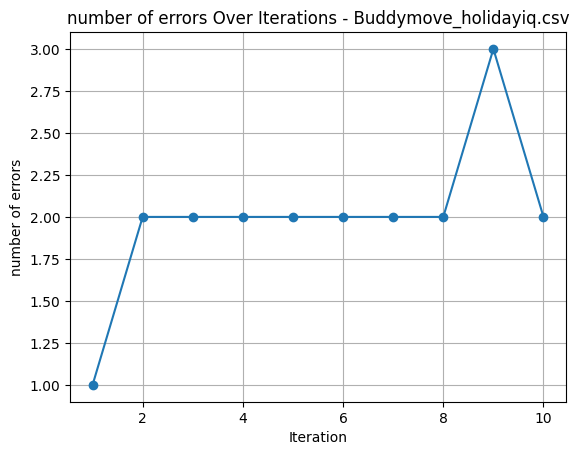

Buddymove_holidayiq.csv Dataset - Final Accuracy: 99.60%
Iterations for Buddymove_holidayiq.csv
Class 1:
Iteration 1: Number of errors = 1
Iteration 2: Number of errors = 2
Iteration 3: Number of errors = 2
Iteration 4: Number of errors = 2
Iteration 5: Number of errors = 2
Iteration 6: Number of errors = 2
Iteration 7: Number of errors = 2
Iteration 8: Number of errors = 2
Iteration 9: Number of errors = 3
Iteration 10: Number of errors = 2

Class 2:
Iteration 1: Number of errors = 3
Iteration 2: Number of errors = 2
Iteration 3: Number of errors = 2
Iteration 4: Number of errors = 2
Iteration 5: Number of errors = 2
Iteration 6: Number of errors = 2
Iteration 7: Number of errors = 2
Iteration 8: Number of errors = 3
Iteration 9: Number of errors = 2
Iteration 10: Number of errors = 1



In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

class SGDClassifier:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class OneVsRestClassifier:
    def __init__(self, base_classifier):
        self.base_classifier = base_classifier
        self.classifiers = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for c in self.classes_:
            self.classifiers[c] = self.base_classifier()
            y_binary = np.where(y == c, 1, -1)
            self.classifiers[c].fit(X, y_binary)

    def predict(self, X):
        preds = []
        for x in X:
            class_scores = {c: self.classifiers[c].predict(x) for c in self.classes_}
            pred = max(class_scores, key=class_scores.get)
            preds.append(pred)
        return np.array(preds)

def load_iris():
    iris_data = pd.read_csv('iris.data', header=None)

    X = iris_data.iloc[0:150,[0,2]].values
    y = iris_data.iloc[0:150,4].values
    y = np.where(y == 'Iris-setosa', 1, np.where(y == 'Iris-Versicolor', -1, -1))
    return X, y

def load_customer():
    customer_data = pd.read_csv('buddymove_holidayiq.csv')
    X = customer_data.iloc[:, 1:].values
    y = customer_data.iloc[:, 0].values
    y = np.where(y == 'User 1', -1, 1)
    return X, y

def plot_errors_over_iterations(errors, n_iter_max, dataset_name):
    plt.plot(range(1, n_iter_max + 1), errors, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('number of errors')
    plt.title(f'number of errors Over Iterations - {dataset_name}')
    plt.grid(True)
    plt.show()

def calculate_accuracy(X, y, classifier):
    preds = classifier.predict(X)
    accuracy = np.mean(preds == y) * 100
    return accuracy

def main():
    datasets = [('iris.data', 0.01, 100), ('buddymove_holidayiq.csv', 0.001, 1000)]

    for dataset, eta, n_iter in datasets:
        X, y = load_iris() if dataset == 'iris.data' else load_customer()

        ovr_classifier = OneVsRestClassifier(SGDClassifier)
        ovr_classifier.fit(X, y)

        errors = []
        n_iter_max = 0
        for c in ovr_classifier.classes_:
            errors.append(ovr_classifier.classifiers[c].errors_)
            n_iter_max = max(n_iter_max, len(ovr_classifier.classifiers[c].errors_))

        plot_errors_over_iterations(errors[0], n_iter_max, dataset.capitalize())
        accuracy = calculate_accuracy(X, y, ovr_classifier)
        print(f"{dataset.capitalize()} Dataset - Final Accuracy: {accuracy:.2f}%")

        # Iterations code snippet
        print("Iterations for", dataset.capitalize())
        for i, class_errors in enumerate(errors):
            print(f"Class {i + 1}:")
            for iter_num, num_updates in enumerate(class_errors, start=1):
                print(f"Iteration {iter_num}: Number of errors = {num_updates}")
            print()

if __name__ == "__main__":
    main()


Classifier3

Iris.data Dataset - Final Accuracy: 0.00%
Total time took to execute  0.006021738052368164


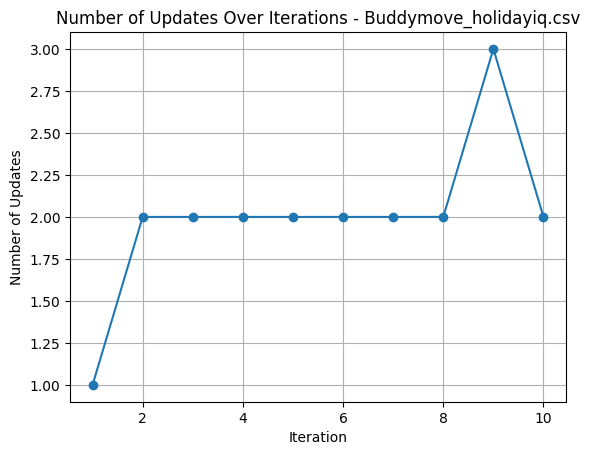

Buddymove_holidayiq.csv Dataset - Final Accuracy: 1.61%
Number of updates: 2
Total time took to execute  11.835877180099487


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
st_time=time.time()



class SGDClassifier:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

class OneVsRestClassifier:
    def __init__(self, base_classifier):
        self.base_classifier = base_classifier
        self.classifiers = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for c in self.classes_:
            self.classifiers[c] = self.base_classifier()
            y_binary = np.where(y == c, 1, -1)
            self.classifiers[c].fit(X, y_binary)

    def predict(self, X):
        preds = []
        for x in X:
            class_scores = {c: self.classifiers[c].predict(x) for c in self.classes_}
            pred = max(class_scores, key=class_scores.get)
            preds.append(pred)
        return np.array(preds)

class Classifier3:
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.where(X[:, 1] == 2, 1, -1)  #

def load_iris():
    iris_data = pd.read_csv('iris.data', header=None)

    X = iris_data.iloc[0:150,[0,2]].values
    y = iris_data.iloc[0:150,4].values

    y = np.where(y == 'Iris-setosa', 1, np.where(y == 'Iris-Versicolor', 2, 3))
    return X, y

def load_customer():
    customer_data = pd.read_csv('buddymove_holidayiq.csv')
    X = customer_data.iloc[:, 1:].values
    y = customer_data.iloc[:, 0].values
    return X, y

def plot_errors_over_iterations(errors, n_iter_max, dataset_name):
    plt.plot(range(1, n_iter_max + 1), errors, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('number of errors')
    plt.title(f'number of errors Over Iterations - {dataset_name}')
    plt.grid(True)
    plt.show()

def calculate_accuracy(X, y, classifier):
    preds = classifier.predict(X)
    accuracy = np.mean(preds == y) * 100
    return accuracy

def main():
    datasets = [('iris.data', 0.01, 100), ('buddymove_holidayiq.csv', 0.001, 1000)]

    for dataset, eta, n_iter in datasets:
        X, y = load_iris() if dataset == 'iris.data' else load_customer()

        if dataset == 'iris.data':
            classifier = Classifier3()
        else:
            classifier = OneVsRestClassifier(SGDClassifier)
        classifier.fit(X, y)

        errors = []
        n_iter_max = 0
        if isinstance(classifier, OneVsRestClassifier):
            for c in classifier.classes_:
                errors.append(classifier.classifiers[c].errors_)
                n_iter_max = max(n_iter_max, classifier.classifiers[c].n_iter)
            plot_errors_over_iterations(errors[0], n_iter_max, dataset.capitalize())
        ed_time=time.time()
        accuracy = calculate_accuracy(X, y, classifier)
        print(f"{dataset.capitalize()} Dataset - Final Accuracy: {accuracy:.2f}%")
        if isinstance(classifier, OneVsRestClassifier):
            print(f"number of errors: {errors[0][-1]}")
        print("Total time took to execute ",ed_time-st_time)

if __name__ == "__main__":
    main()
